In [1]:
import numpy as np
import pandas as pd

# 进阶部分

建立一个以 2018 年每一天为索引，值为随机数的 Series

In [2]:
dti = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2018-01-01    0.758421
2018-01-02    0.076537
2018-01-03    0.682523
2018-01-04    0.343259
2018-01-05    0.776827
                ...   
2018-12-27    0.926824
2018-12-28    0.500960
2018-12-29    0.198886
2018-12-30    0.749430
2018-12-31    0.292557
Freq: D, Length: 365, dtype: float64

统计s 中每一个周三对应值的和

In [3]:
# 周一从 0 开始
s[s.index.weekday == 2].sum()

24.95591459764368

统计s中每个月值的平均值

In [4]:
s.resample('M').mean()

2018-01-31    0.502913
2018-02-28    0.441614
2018-03-31    0.610937
2018-04-30    0.470822
2018-05-31    0.382386
2018-06-30    0.554850
2018-07-31    0.548586
2018-08-31    0.479953
2018-09-30    0.513350
2018-10-31    0.482317
2018-11-30    0.496988
2018-12-31    0.542798
Freq: M, dtype: float64

将 Series 中的时间进行转换（秒转分钟）

In [8]:
s = pd.date_range('today', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(s)), index=s)

ts.resample('Min').sum()

2020-04-17 15:45:00     7201
2020-04-17 15:46:00    12486
2020-04-17 15:47:00     2211
Freq: T, dtype: int32

UTC 世界时间标准

In [9]:
# 获取当前时间
s = pd.date_range('today', periods=1, freq='D')  

# 随机数值
ts = pd.Series(np.random.randn(len(s)), s)  

# 转换为 UTC 时间
ts_utc = ts.tz_localize('UTC') 
ts_utc

2020-04-17 15:46:12.296158+00:00    0.689253
Freq: D, dtype: float64

转换为上海所在时区

In [10]:
ts_utc.tz_convert('Asia/Shanghai')

2020-04-17 23:46:12.296158+08:00    0.689253
Freq: D, dtype: float64

不同时间表示方式的转换

In [11]:
rng = pd.date_range('1/1/2018', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ps = ts.to_period()
print(ps)
ps.to_timestamp()

2018-01-31    1.509714
2018-02-28   -1.530909
2018-03-31    0.910403
2018-04-30   -1.100740
2018-05-31   -1.806895
Freq: M, dtype: float64
2018-01    1.509714
2018-02   -1.530909
2018-03    0.910403
2018-04   -1.100740
2018-05   -1.806895
Freq: M, dtype: float64


2018-01-01    1.509714
2018-02-01   -1.530909
2018-03-01    0.910403
2018-04-01   -1.100740
2018-05-01   -1.806895
Freq: MS, dtype: float64

### Series多重索引

创建多重索引Series

In [12]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

# 设置多重索引
mi = pd.MultiIndex.from_product([letters, numbers])  

# 随机数
s = pd.Series(np.random.rand(30), index=mi)  
s

A  0    0.283579
   1    0.858782
   2    0.771638
   3    0.005818
   4    0.154117
   5    0.446406
   6    0.597653
   7    0.150448
   8    0.273438
   9    0.482735
B  0    0.922694
   1    0.208327
   2    0.600877
   3    0.744219
   4    0.610871
   5    0.160592
   6    0.418797
   7    0.604511
   8    0.720259
   9    0.037850
C  0    0.608595
   1    0.013537
   2    0.347625
   3    0.373507
   4    0.501340
   5    0.766539
   6    0.150685
   7    0.220510
   8    0.421033
   9    0.617858
dtype: float64

多重索引 Series 查询

In [13]:
# 查询索引为 1，3，6 的值
s.loc[:, [1, 3, 6]]

A  1    0.858782
   3    0.005818
   6    0.597653
B  1    0.208327
   3    0.744219
   6    0.418797
C  1    0.013537
   3    0.373507
   6    0.150685
dtype: float64

多重索引 Series 切片

In [14]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.446406
   6    0.597653
   7    0.150448
   8    0.273438
   9    0.482735
B  5    0.160592
   6    0.418797
   7    0.604511
   8    0.720259
   9    0.037850
dtype: float64

### DataFrame多重索引

根据多重索引创建 DataFrame

In [15]:
frame = pd.DataFrame(np.arange(12).reshape(6, 2),
                     index=[list('AAABBB'), list('123123')],
                     columns=['hello', 'shiyanlou'])
frame

hello  shiyanlou
A 1      0          1
  2      2          3
  3      4          5
B 1      6          7
  2      8          9
  3     10         11

多重索引设置列名称

In [16]:
frame.index.names = ['first', 'second']
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

DataFrame 多重索引分组求和

In [17]:
frame.groupby('first').sum()

,hello,shiyanlou
first,,
A,6,9
B,24,27


DataFrame 行列名称转换

In [18]:
print(frame)
frame.stack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


first  second           
A      1       hello         0
               shiyanlou     1
       2       hello         2
               shiyanlou     3
       3       hello         4
               shiyanlou     5
B      1       hello         6
               shiyanlou     7
       2       hello         8
               shiyanlou     9
       3       hello        10
               shiyanlou    11
dtype: int32

DataFrame 索引转换

In [19]:
print(frame)
frame.unstack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


hello        shiyanlou       
second     1  2   3         1  2   3
first                               
A          0  2   4         1  3   5
B          6  8  10         7  9  11

DataFrame 条件查找

In [20]:
# 示例数据
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

In [21]:
df[df['age'] > 3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


根据行列索引切片

In [22]:
df.iloc[2:4, 1:3]

,age,visits
c,0.5,2
d,NaN,3


DataFrame 多重条件查询

In [23]:
df = pd.DataFrame(data, index=labels)

df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


DataFrame 按关键字查询

In [25]:
df[df['animal'].isin(['cat', 'dog'])]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


DataFrame 按标签及列名查询

In [27]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


DataFrame 多条件排序

In [29]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


DataFrame 多值替换

In [30]:
df['priority'].map({'yes': True, 'no': False})

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

DataFrame 分组求和

In [32]:
df.groupby('animal').sum()

,age,visits
animal,,
cat,7.5,8
dog,15.0,8
snake,5.0,3


使用列表拼接多个 DataFrame

In [33]:
temp_df1 = pd.DataFrame(np.random.randn(5, 4)) 
temp_df2 = pd.DataFrame(np.random.randn(5, 4)) 
temp_df3 = pd.DataFrame(np.random.randn(5, 4))  

print(temp_df1)
print(temp_df2)
print(temp_df3)

pieces = [temp_df1, temp_df2, temp_df3]
pd.concat(pieces)

          0         1         2         3
0  0.943015  1.026472 -1.271330 -1.863569
1 -1.102367  1.107942  1.790862  0.556090
2  0.261888 -0.209591 -1.915433  0.488444
3  0.029360  0.711379 -0.490254 -0.400511
4 -0.263994  1.167774  1.426568 -0.497679
          0         1         2         3
0  1.127027 -0.792559 -0.855119 -0.129174
1 -1.376204 -0.135172  1.233136  0.270542
2  0.726728 -1.344615  0.720781  0.365268
3  0.275054  1.628386  1.783330 -1.467377
4  0.338750  0.558613  1.650727  1.066214
          0         1         2         3
0 -0.832462  0.597819 -0.412482 -0.703539
1  1.068181 -1.643831 -0.026499 -0.823857
2 -2.511486 -1.477893  0.203057 -0.711032
3 -0.202261 -1.903986  0.909121 -0.187427
4  2.645868 -0.005172 -1.261465 -2.341169


,0,1,2,3
0,0.943015,1.026472,-1.271330,-1.863569
1,-1.102367,1.107942,1.790862,0.556090
2,0.261888,-0.209591,-1.915433,0.488444
3,0.029360,0.711379,-0.490254,-0.400511
4,-0.263994,1.167774,1.426568,-0.497679
0,1.127027,-0.792559,-0.855119,-0.129174
1,-1.376204,-0.135172,1.233136,0.270542
2,0.726728,-1.344615,0.720781,0.365268
3,0.275054,1.628386,1.783330,-1.467377
4,0.338750,0.558613,1.650727,1.066214


找出 DataFrame 表中和最小的列

In [34]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df)

# idxmax(), idxmin() 为 Series 函数返回最大最小值的索引值
df.sum().idxmin()  

          a         b         c         d         e         f         g  \
0  0.779053  0.424046  0.646497  0.662850  0.901021  0.349760  0.934657   
1  0.568518  0.428696  0.073759  0.460868  0.764555  0.816020  0.302745   
2  0.810986  0.511187  0.300716  0.744041  0.221777  0.239518  0.982866   
3  0.834216  0.160567  0.852610  0.077196  0.667007  0.768109  0.523278   
4  0.341075  0.186400  0.902285  0.875498  0.582569  0.963347  0.520758   

          h         i         j  
0  0.324727  0.204261  0.617331  
1  0.543217  0.355610  0.592495  
2  0.031088  0.878571  0.228952  
3  0.437993  0.728168  0.146538  
4  0.445465  0.495565  0.973137  


'b'

DataFrame 中每个元素减去每一行的平均值

In [35]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.sub(df.mean(axis=1), axis=0)

          0         1         2
0  0.792662  0.417698  0.095801
1  0.662644  0.432966  0.018864
2  0.570624  0.059414  0.667554
3  0.319366  0.447234  0.034271
4  0.363027  0.848264  0.741136


,0,1,2
0,0.357275,-0.017689,-0.339586
1,0.291153,0.061475,-0.352627
2,0.138094,-0.373117,0.235023
3,0.052409,0.180277,-0.232686
4,-0.287782,0.197455,0.090327


DataFrame 分组，并得到每一组中最大三个数之和

In [36]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'),
                   'B': [12, 345, 3, 1, 45, 14, 4, 52, 54, 23, 235, 21, 57, 3, 87]})
print(df)
df.groupby('A')['B'].nlargest(3).sum(level=0)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87


A
a    409
b    156
c    345
Name: B, dtype: int64

### 透视表

透视表的创建

In [38]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

print(df)

pd.pivot_table(df, index=['A', 'B', 'C'])

        A  B    C         D         E
0     one  A  foo -1.140521  0.870765
1     one  B  foo -0.120741 -0.970221
2     two  C  foo  0.743641 -0.769879
3   three  A  bar  0.311517 -0.897380
4     one  B  bar -0.544141 -0.166859
5     one  C  bar  0.232328 -1.603387
6     two  A  foo -1.208519  0.328406
7   three  B  foo -2.114268  0.777290
8     one  C  foo -0.961909 -1.308391
9     one  A  bar  0.605525 -0.654200
10    two  B  bar -0.307246 -0.538044
11  three  C  bar -0.158796  0.568490


D         E
A     B C                      
one   A bar  0.605525 -0.654200
        foo -1.140521  0.870765
      B bar -0.544141 -0.166859
        foo -0.120741 -0.970221
      C bar  0.232328 -1.603387
        foo -0.961909 -1.308391
three A bar  0.311517 -0.897380
      B foo -2.114268  0.777290
      C bar -0.158796  0.568490
two   A foo -1.208519  0.328406
      B bar -0.307246 -0.538044
      C foo  0.743641 -0.769879

透视表按指定行进行聚合

In [39]:
pd.pivot_table(df, values=['D'], index=['A', 'B'])

D
A     B          
one   A -0.267498
      B -0.332441
      C -0.364791
three A  0.311517
      B -2.114268
      C -0.158796
two   A -1.208519
      B -0.307246
      C  0.743641

透视表聚合方式定义

In [40]:
pd.pivot_table(df, values=['D'], index=['A', 'B'], aggfunc=[np.sum, len])

sum  len
                D    D
A     B               
one   A -0.534996  2.0
      B -0.664881  2.0
      C -0.729582  2.0
three A  0.311517  1.0
      B -2.114268  1.0
      C -0.158796  1.0
two   A -1.208519  1.0
      B -0.307246  1.0
      C  0.743641  1.0

透视表利用额外列进行辅助分割

In [41]:
pd.pivot_table(df, values=['D'], index=['A', 'B'],
               columns=['C'], aggfunc=np.sum)

D          
C             bar       foo
A     B                    
one   A  0.605525 -1.140521
      B -0.544141 -0.120741
      C  0.232328 -0.961909
three A  0.311517       NaN
      B       NaN -2.114268
      C -0.158796       NaN
two   A       NaN -1.208519
      B -0.307246       NaN
      C       NaN  0.743641

透视表的缺失值处理

In [42]:
pd.pivot_table(df, values=['D'], index=['A', 'B'],
               columns=['C'], aggfunc=np.sum, fill_value=0)

D          
C             bar       foo
A     B                    
one   A  0.605525 -1.140521
      B -0.544141 -0.120741
      C  0.232328 -0.961909
three A  0.311517  0.000000
      B  0.000000 -2.114268
      C -0.158796  0.000000
two   A  0.000000 -1.208519
      B -0.307246  0.000000
      C  0.000000  0.743641

### 绝对类型

在数据的形式上主要包括数量型和性质型，数量型表示着数据可数范围可变，而性质型表示范围已经确定不可改变，绝对型数据就是性质型数据的一种。

绝对型数据定义

In [43]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": [
                  'a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


对绝对型数据重命名

In [44]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


重新排列绝对型数据并补充相应的缺失值

In [45]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


对绝对型数据进行排序

In [46]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


对绝对型数据进行分组

In [47]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 数据清洗

缺失值拟合

In [60]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


数据列拆分

In [61]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


字符标准化

In [62]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

In [63]:
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


删除坏数据加入整理好的数据

In [64]:
df = df.drop('From_To', axis=1)
df = df.join(temp)
print(df)

   FlightNumber  RecentDelays              Airline      From         To
0         10045      [23, 47]               KLM(!)    London      Paris
1         10055            []    <Air France> (12)    Madrid      Milan
2         10065  [24, 43, 87]  (British Airways. )    London  Stockholm
3         10075          [13]       12. Air France  Budapest      Paris
4         10085      [67, 32]          "Swiss Air"  Brussels     London


去除多余字符

In [65]:
df['Airline'] = df['Airline'].str.extract(
    '([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


格式规范

In [66]:
delays = df['RecentDelays'].apply(pd.Series)

In [67]:
delays

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [68]:
delays.columns = ['delay_{}'.format(n)
                  for n in range(1, len(delays.columns)+1)]

In [69]:
delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [70]:
df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


### 数据预处理

信息区间划分

In [71]:
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})

In [72]:
df

,name,grades
0,Alice,58
1,Bob,83
2,Candy,79
3,Dany,65
4,Ella,93
5,Frank,45
6,Grace,61
7,Jenny,88


In [73]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Candy', 'Dany', 'Ella',
                            'Frank', 'Grace', 'Jenny'],
                   'grades': [58, 83, 79, 65, 93, 45, 61, 88]})


def choice(x):
    if x > 60:
        return 1
    else:
        return 0


df.grades = pd.Series(map(lambda x: choice(x), df.grades))
df

,name,grades
0,Alice,0
1,Bob,1
2,Candy,1
3,Dany,1
4,Ella,1
5,Frank,0
6,Grace,1
7,Jenny,1


数据去重

In [74]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

In [75]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


数据归一化
- Max-Min 归一化

In [76]:
def normalization(df):
    numerator = df.sub(df.min())
    denominator = (df.max()).sub(df.min())
    Y = numerator.div(denominator)
    return Y


df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
normalization(df)

          0         1         2
0  0.200670  0.438947  0.912923
1  0.384884  0.196478  0.037075
2  0.279621  0.547497  0.649347
3  0.350985  0.455404  0.341967
4  0.308659  0.498923  0.628620


,0,1,2
0,0.000000,0.690757,1.000000
1,1.000000,0.000000,0.000000
2,0.428582,1.000000,0.699061
3,0.815980,0.737640,0.348110
4,0.586215,0.861618,0.675396


### Pandas绘图操作

Series可视化

In [77]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('today', periods=100))
ts

2020-04-17 18:26:28.866862    0.369711
2020-04-18 18:26:28.866862   -2.909807
2020-04-19 18:26:28.866862    0.735870
2020-04-20 18:26:28.866862   -0.568459
2020-04-21 18:26:28.866862   -0.425184
                                ...   
2020-07-21 18:26:28.866862    1.611215
2020-07-22 18:26:28.866862    0.981976
2020-07-23 18:26:28.866862    0.695166
2020-07-24 18:26:28.866862    1.119676
2020-07-25 18:26:28.866862   -1.012894
Freq: D, Length: 100, dtype: float64

In [78]:
ts = ts.cumsum()
ts

2020-04-17 18:26:28.866862    0.369711
2020-04-18 18:26:28.866862   -2.540097
2020-04-19 18:26:28.866862   -1.804227
2020-04-20 18:26:28.866862   -2.372686
2020-04-21 18:26:28.866862   -2.797870
                                ...   
2020-07-21 18:26:28.866862    5.255105
2020-07-22 18:26:28.866862    6.237080
2020-07-23 18:26:28.866862    6.932247
2020-07-24 18:26:28.866862    8.051923
2020-07-25 18:26:28.866862    7.039029
Freq: D, Length: 100, dtype: float64

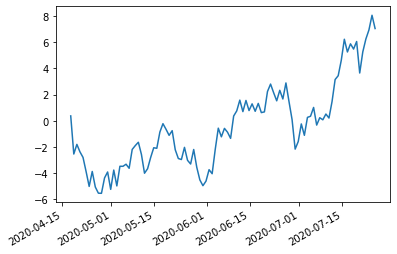

In [79]:
ts.plot()

DataFrame 折线图

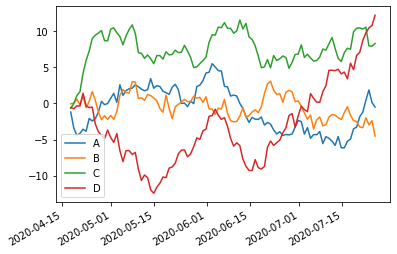

In [80]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

DataFrame 散点图

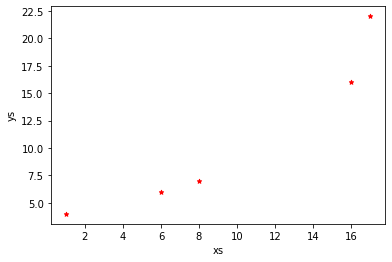

In [81]:
df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})
df = df.cumsum()
df.plot.scatter("xs", "ys", color='red', marker="*")

DataFrame 柱形图

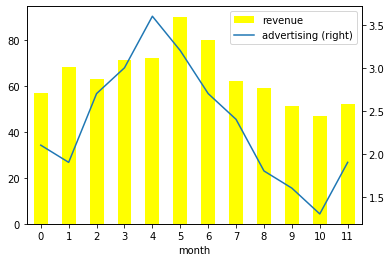

In [82]:
df = pd.DataFrame({"revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
                   "advertising": [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
                   "month": range(12)
                   })

ax = df.plot.bar("month", "revenue", color="yellow")
df.plot("month", "advertising", secondary_y=True, ax=ax)